# Keras Syntax Basics

In [34]:
import pandas as pd

In [ ]:
df = pd.read_csv("fake_reg.csv")

In [36]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [37]:
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
# df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/fake_reg.csv')

In [39]:
# df.head()

In [40]:
df.shape

(1000, 3)

In [41]:
df.isnull().sum().any()

False

In [42]:
import seaborn as sns
import matplotlib.pyplot as pl


In [43]:
sns.pairplot(df)

In [8]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[["feature1", "feature2"]].values

In [11]:
y=df["price"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [15]:
#scaling data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler2 = MinMaxScaler()

In [18]:
scaler2.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler2.transform(X_train)

In [20]:
X_test = scaler2.transform(X_test)

In [21]:
X_train.min()

0.0

In [22]:
X_train.max()

1.0

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

In [1]:
# pip install tensorflow

In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
tf.__version__

NameError: name 'tf' is not defined

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense, Activation

In [33]:
model6 = Sequential()
model6.add(Dense(4, input_dim=2, activation="relu"))           #input_dim = 2  or input_dim = X_train.shape[0]
model6.add(Dense(4, activation="relu"))
model6.add(Dense(2, activation="relu"))
model6.add(Dense(1))
model6.compile(optimizer="rmsprop", loss="mse")

In [ ]:
model6.fit(X_train, y_train, batch_size=16, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - ETA: 0s - loss: 255587.58 - 10s 14ms/sample - loss: 256770.6914
Epoch 2/250
700/700 [==============================] - 1s 1ms/sample - loss: 256666.2096
Epoch 3/250
700/700 [==============================] - 1s 1ms/sample - loss: 256613.7689
Epoch 4/250
700/700 [==============================] - 1s 1ms/sample - loss: 256569.3648
Epoch 5/250
700/700 [==============================] - 1s 1ms/sample - loss: 256525.43680s - loss:
Epoch 6/250
700/700 [==============================] - 1s 974us/sample - loss: 256481.7001
Epoch 7/250
700/700 [==============================] - 1s 1ms/sample - loss: 256438.0421
Epoch 8/250
700/700 [==============================] - 1s 1ms/sample - loss: 256394.2273
Epoch 9/250
700/700 [==============================] - 1s 1ms/sample - loss: 256350.3996
Epoch 10/250
700/700 [==============================] - 1s 2ms/sample - loss: 256306.60040s - loss: 253 - ETA: 0s - loss:
Epoch 11/250
7

In [ ]:
model6.summary()

In [ ]:
loss_df=pd.DataFrame(model6.history.history)

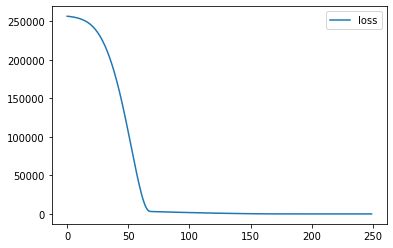

In [ ]:
loss_df.plot()

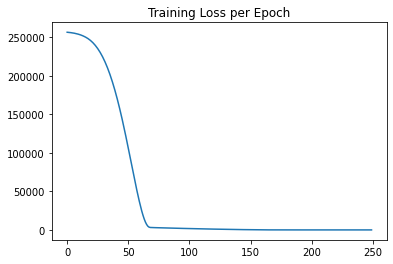

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
loss = model6.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
loss_df.loss.idxmin() 

236

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
y_pred = model6.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971349975790853 
 mae: 4.0296127171465965 
 mse: 25.189192006166255 
 rmse: 5.018883541801529


In [ ]:
y_test.shape

(300,)

In [ ]:
y_pred.shape

(300, 1)

In [ ]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [ ]:
compare.sample(5)

,Actual,Pred
288,449.458484,449.628784
174,549.847620,549.997986
131,420.766213,423.987885
273,375.959380,381.969147
226,603.887577,606.049194
